In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

#print(coordinates)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


607

In [7]:
import requests

requests.__version__

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b06a27fc02fd49319eefe20089c8960


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | pasighat
Processing Record 8 of Set 1 | aksarka
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | firminy
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | danville
Processing Record 14 of Set 1 | vanimo
Processing Record 15 of Set 1 | guarapari
Processing Record 16 of Set 1 | nhulunbuy
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | plettenberg bay
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | namwala
Processing Record 21 of Set 1 | nantucket
Processing Record 22 of Set 1 | vila franca do campo
Processing Record 23 of Set 1 | r

In [13]:
print (len(city_data))

553


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.9266,125.4092,60.84,85,100,3.29,TL,2022-01-29 15:29:28
1,San Cristobal,7.7669,-72.2250,73.58,39,6,4.41,VE,2022-01-29 15:29:29
2,Rikitea,-23.1203,-134.9692,77.07,76,85,11.95,PF,2022-01-29 15:29:29
3,Saint-Philippe,-21.3585,55.7679,81.99,85,59,8.59,RE,2022-01-29 15:28:48
4,Naze,28.3667,129.4833,55.40,85,100,11.56,JP,2022-01-29 15:28:49
5,Pasighat,28.0667,95.3333,53.87,64,9,4.70,IN,2022-01-29 15:26:04
6,Aksarka,66.5606,67.7975,-1.10,95,100,7.05,RU,2022-01-29 15:29:30
7,Punta Arenas,-53.1500,-70.9167,59.02,62,75,19.57,CL,2022-01-29 15:25:36
8,Firminy,45.3873,4.2907,36.14,86,100,2.30,FR,2022-01-29 15:29:31
9,Tiksi,71.6872,128.8694,-8.63,100,51,3.91,RU,2022-01-29 15:29:27


In [15]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2022-01-29 15:29:28,-8.9266,125.4092,60.84,85,100,3.29
1,San Cristobal,VE,2022-01-29 15:29:29,7.7669,-72.2250,73.58,39,6,4.41
2,Rikitea,PF,2022-01-29 15:29:29,-23.1203,-134.9692,77.07,76,85,11.95
3,Saint-Philippe,RE,2022-01-29 15:28:48,-21.3585,55.7679,81.99,85,59,8.59
4,Naze,JP,2022-01-29 15:28:49,28.3667,129.4833,55.40,85,100,11.56
5,Pasighat,IN,2022-01-29 15:26:04,28.0667,95.3333,53.87,64,9,4.70
6,Aksarka,RU,2022-01-29 15:29:30,66.5606,67.7975,-1.10,95,100,7.05
7,Punta Arenas,CL,2022-01-29 15:25:36,-53.1500,-70.9167,59.02,62,75,19.57
8,Firminy,FR,2022-01-29 15:29:31,45.3873,4.2907,36.14,86,100,2.30
9,Tiksi,RU,2022-01-29 15:29:27,71.6872,128.8694,-8.63,100,51,3.91


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

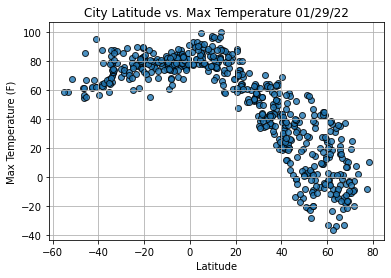

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

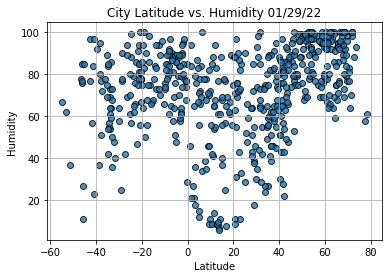

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

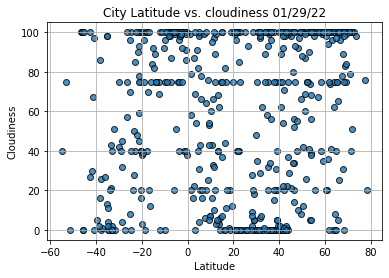

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

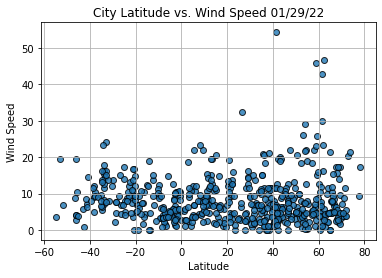

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()